# Predicting the Grade of student using different features and gathering insights from School data

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize":(15,8)})
import warnings
warnings.filterwarnings('ignore')

In [332]:
data=pd.read_csv("xAPI-Edu-Data.csv")
d=data["Class"]

In [333]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


>Exploratory Data Analysis

In [334]:
data.shape

(480, 17)

In [335]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [336]:
data["gender"].unique()

array(['M', 'F'], dtype=object)

There are more Male students as compared to female

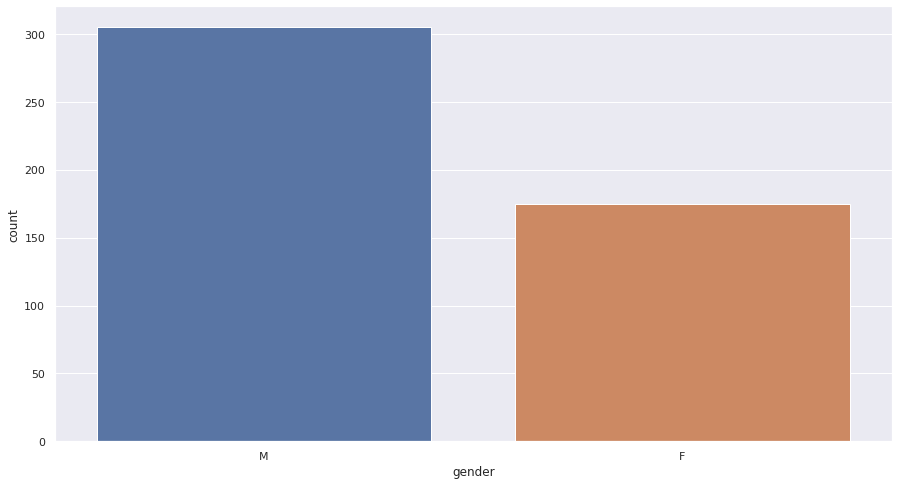

In [337]:
sns.countplot(data["gender"])

From the graph we can see that KW and Jordan got the maximum population of students

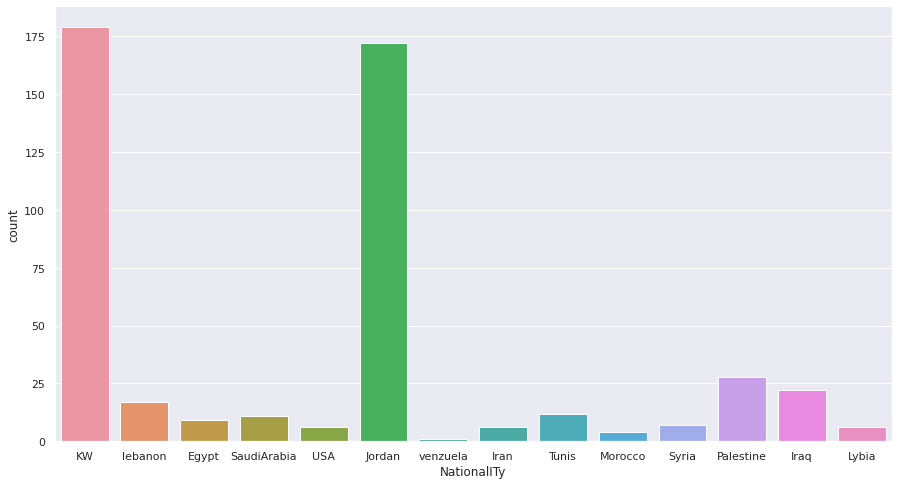

In [338]:
sns.countplot(data["NationalITy"])

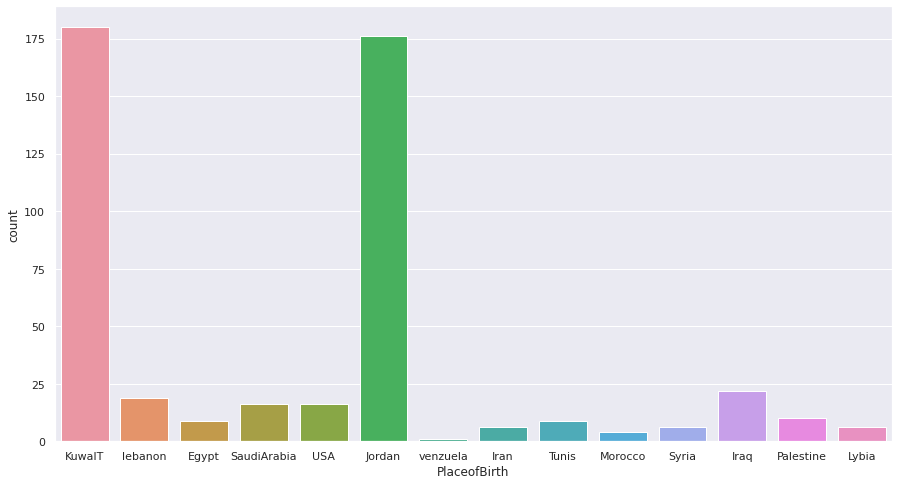

In [339]:
sns.countplot(data["PlaceofBirth"])

We can see high school got less number of students

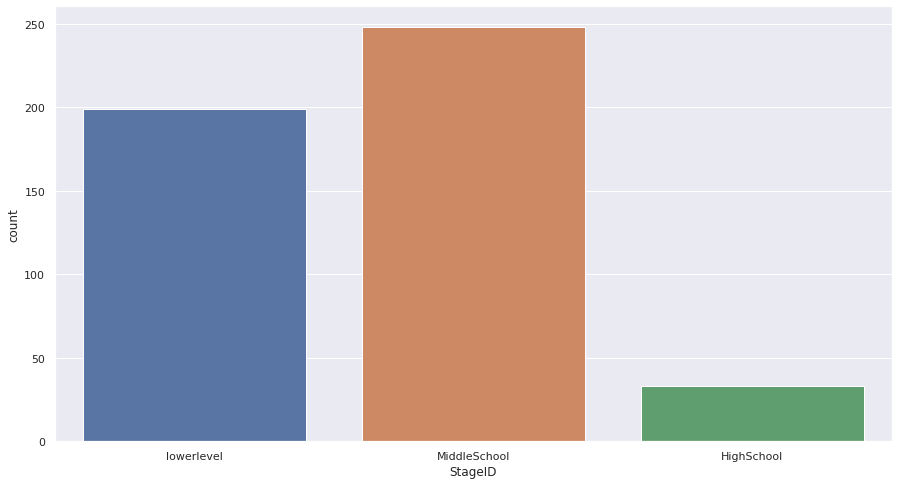

In [340]:
sns.countplot(data["StageID"])

Section A got the maximum students and section C the least 

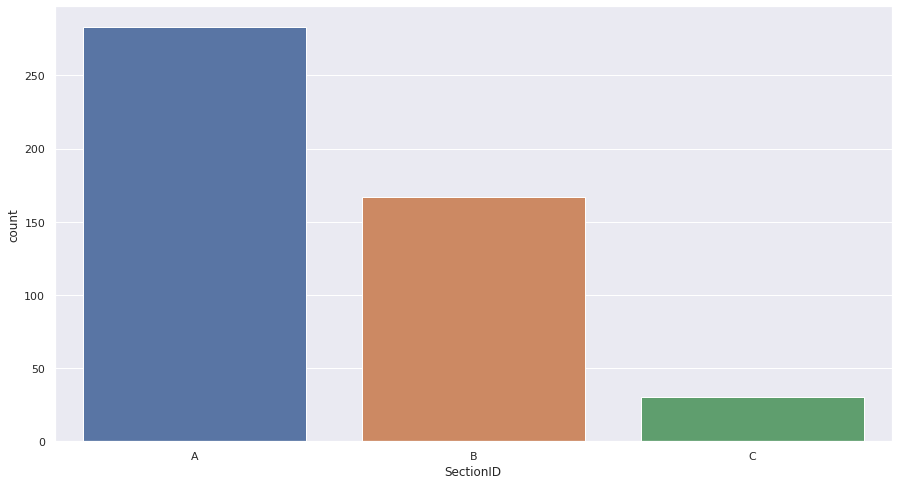

In [341]:
sns.countplot(data["SectionID"])

>There are many student who are falling in G-02 , G-07 and G-08 and less number of students as we move towards G-09 G-10 onwards

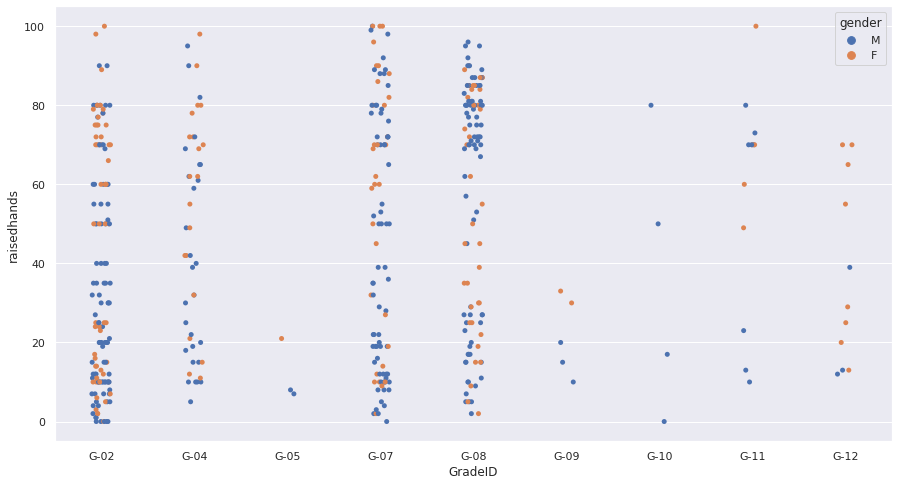

In [342]:
sns.stripplot(data=data,y="raisedhands",x='GradeID',hue='gender',order=['G-02',"G-04","G-05","G-07","G-08","G-09",'G-10','G-11','G-12'])

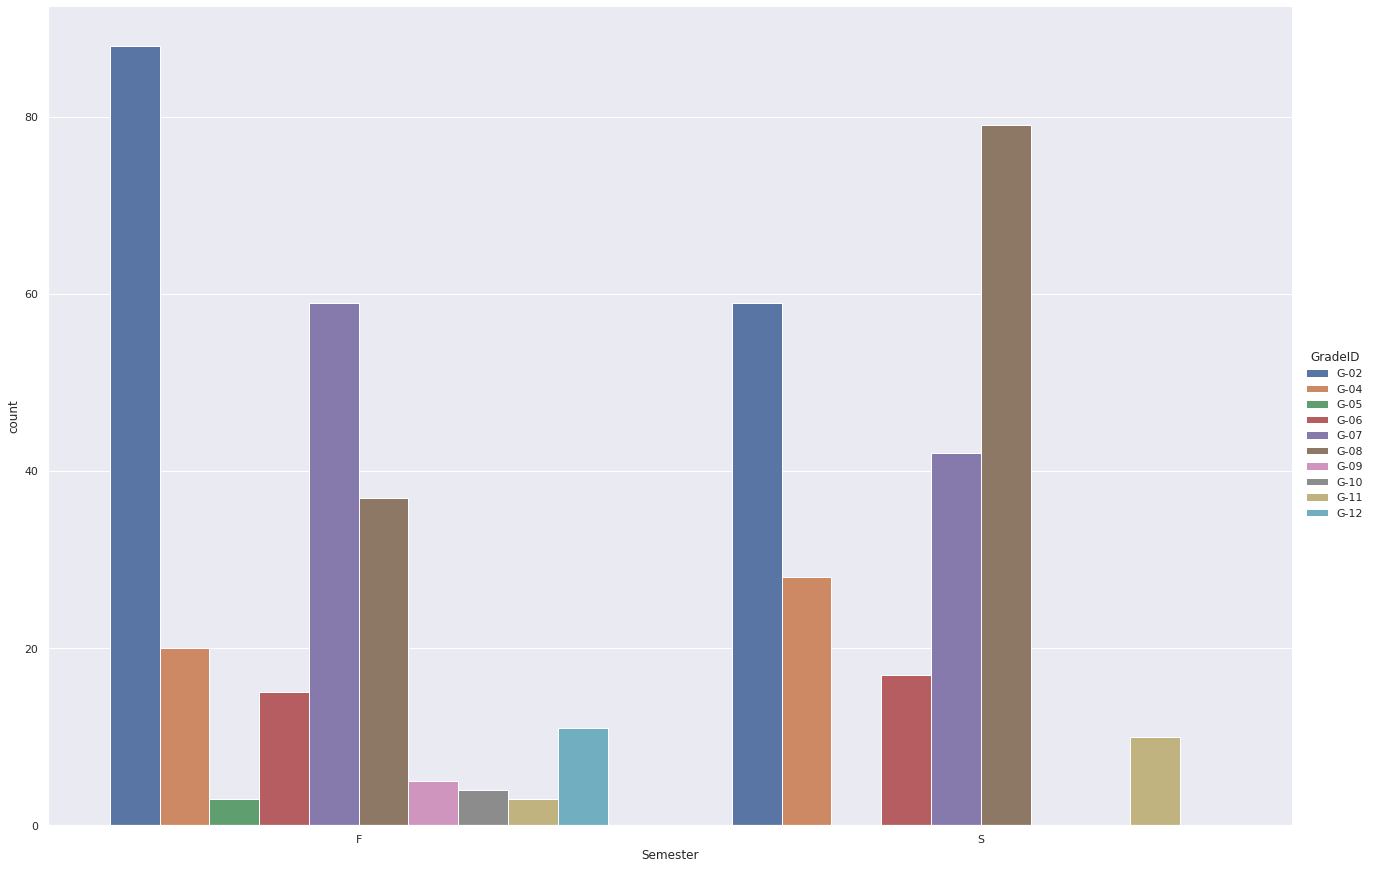

In [343]:
sns.factorplot(x="Semester",hue="GradeID",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True
               ,hue_order=['G-02',"G-04","G-05",'G-06',"G-07","G-08","G-09",'G-10','G-11','G-12'])


From the Graph we can say that

*   We can see that category lowerlevel has more grade G-02 as compared to any
*   Middle level has more students concentrated at grade G-07,G-08 and high school has students more concentrated at grade G-11 and G-12
*   We can say that students are getting less and less grade while they are moving to next class and the amount of students are also receding 


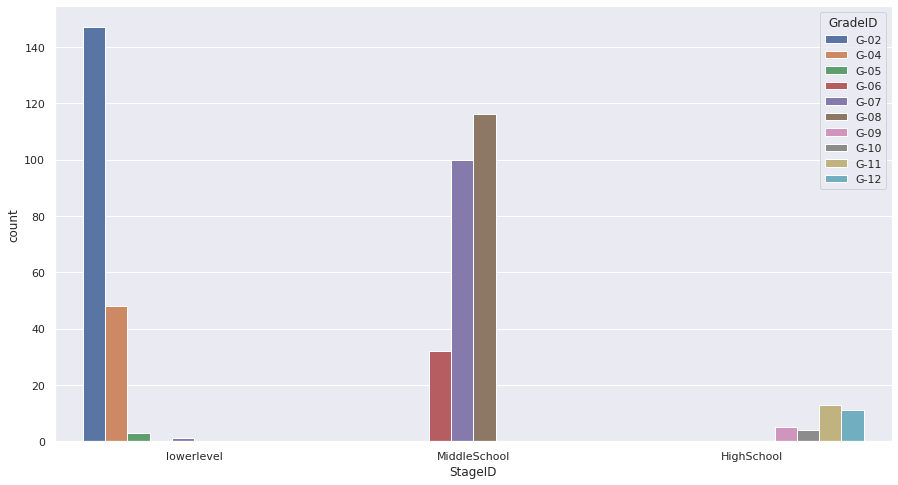

In [344]:
sns.countplot(data=data,x='StageID',hue='GradeID',hue_order=['G-02',"G-04","G-05",'G-06',"G-07","G-08","G-09",'G-10','G-11','G-12'])

From the graph we can see that

*   Section A got the maximum students with grade G-08 
*   Section B got the only maximum students with G-02 more than students from section A as strength of section B is low still more students are performing G-02
* Section C has less population of students but it's students are performing equally with grade G-02 and G-08



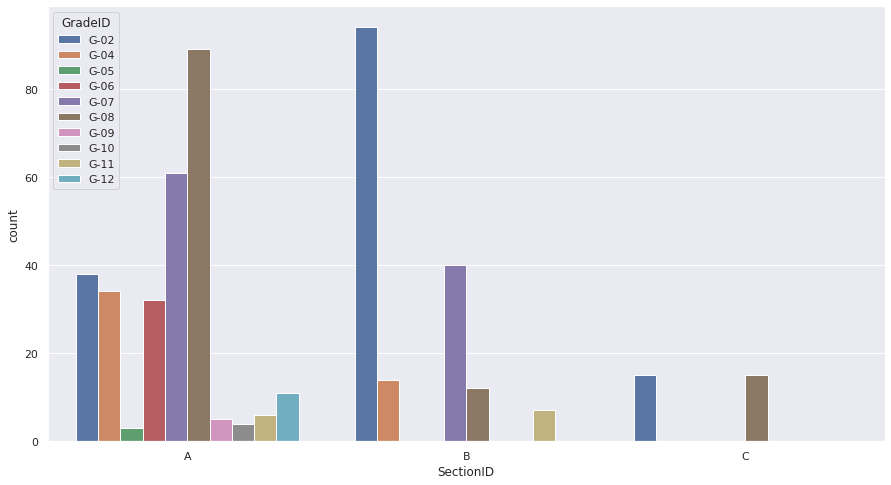

In [345]:
sns.countplot(data=data,x='SectionID',hue='GradeID',hue_order=['G-02',"G-04","G-05",'G-06',"G-07","G-08","G-09",'G-10','G-11','G-12'])

From the graph we can see 
*    There are no student of high school from Jordan
*    Venzuela got only students who are in highschool 
*    There are more students from Lybia and iran in Lower level school
*    We can see there is more possibility that mostly students are in middle school from all countries



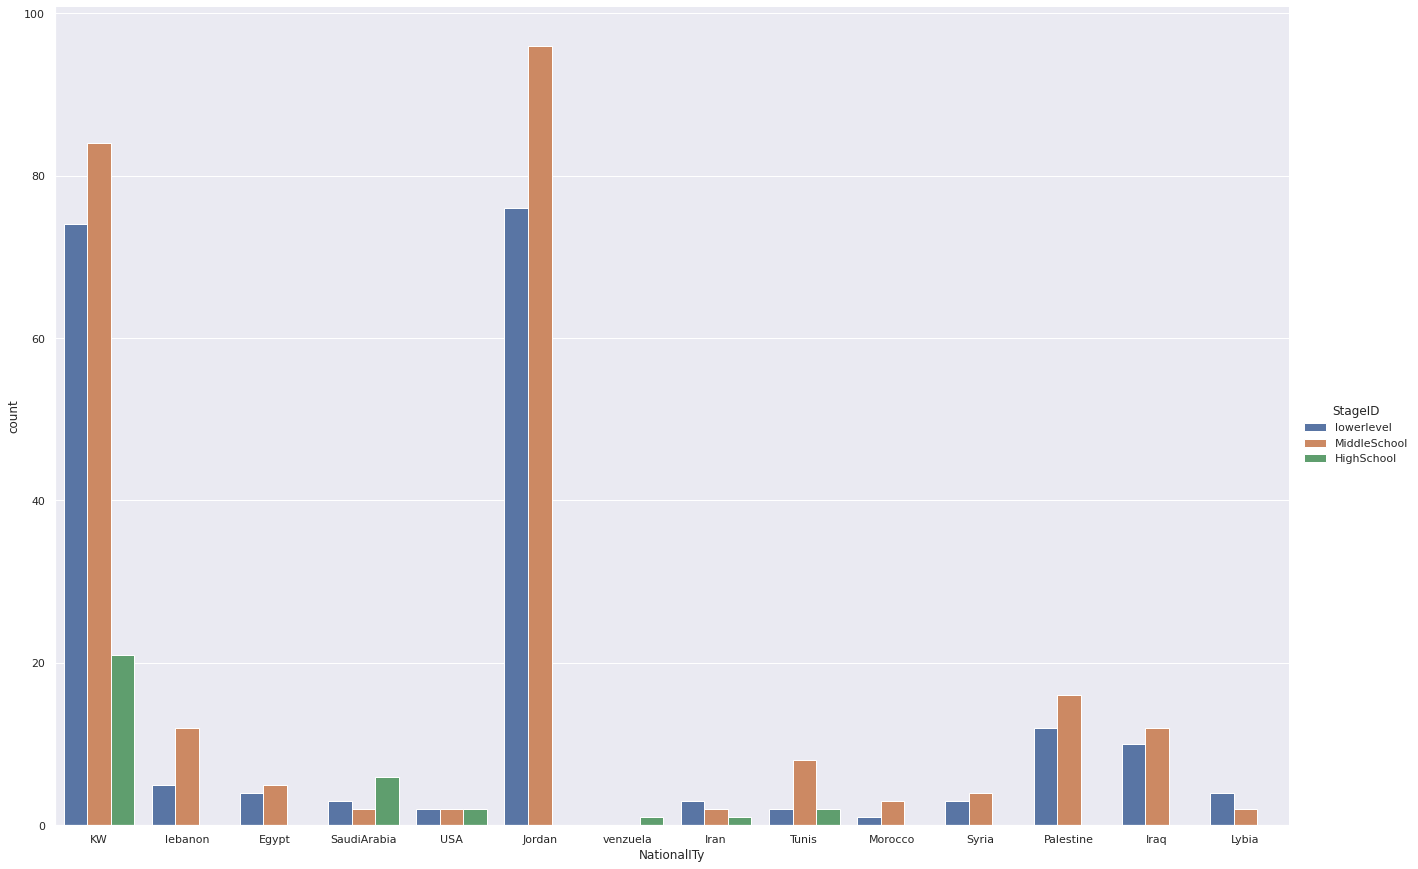

In [346]:
sns.factorplot(x="NationalITy",hue="StageID",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

From the graph we can see that

*   KW parents are reporting equal votes for the satisfaction from the school
*   Jordan parents are highly satisfied from school
* Palestine , Iraq , Lybia parents are 100% satisfied with the school
* Parents from saudia arabia and Tunis are not that much satisfied from the school



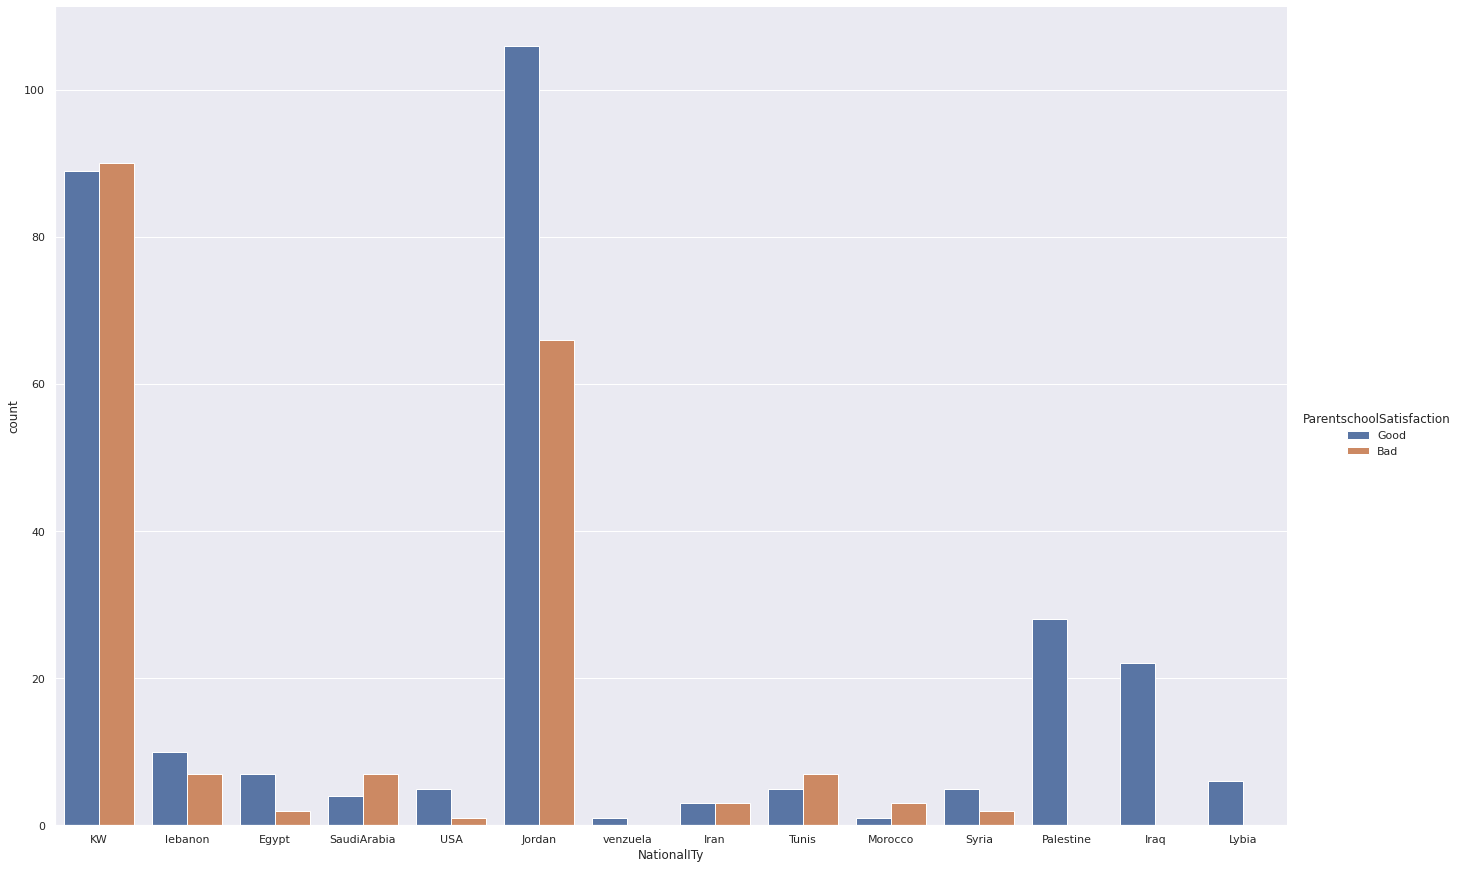

In [347]:
sns.factorplot(hue="ParentschoolSatisfaction",x="NationalITy",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

> Data Preprocessing

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [349]:
data["gender"]=data["gender"].map({"M":0,"F":1})

In [350]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [351]:
data["Relation"]=data["Relation"].map({"Father":0,"Mum":1})

In [352]:
datacopy=data

In [353]:
datacopy.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,15,16,2,20,Yes,Good,Under-7,M
1,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,20,20,3,25,Yes,Good,Under-7,M
2,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,10,7,0,30,No,Bad,Above-7,L
3,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,30,25,5,35,No,Bad,Above-7,L
4,0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,40,50,12,50,No,Bad,Above-7,M


In [354]:
dummy=pd.get_dummies(datacopy["StageID"])

In [355]:
datacopy=pd.concat([datacopy,dummy],axis=1)

In [356]:
datacopy=datacopy.drop("StageID",axis=1)

In [357]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    int64 
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   GradeID                   480 non-null    object
 4   SectionID                 480 non-null    object
 5   Topic                     480 non-null    object
 6   Semester                  480 non-null    object
 7   Relation                  480 non-null    int64 
 8   raisedhands               480 non-null    int64 
 9   VisITedResources          480 non-null    int64 
 10  AnnouncementsView         480 non-null    int64 
 11  Discussion                480 non-null    int64 
 12  ParentAnsweringSurvey     480 non-null    object
 13  ParentschoolSatisfaction  480 non-null    object
 14  StudentAbsenceDays        

In [358]:
datacopy["ParentAnsweringSurvey"]=datacopy["ParentAnsweringSurvey"].replace("Yes",1)
datacopy["ParentAnsweringSurvey"]=datacopy["ParentAnsweringSurvey"].replace("No",0)

In [359]:
datacopy.head()

,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,HighSchool,MiddleSchool,lowerlevel
0,0,KW,KuwaIT,G-04,A,IT,F,0,15,16,2,20,1,Good,Under-7,M,0,0,1
1,0,KW,KuwaIT,G-04,A,IT,F,0,20,20,3,25,1,Good,Under-7,M,0,0,1
2,0,KW,KuwaIT,G-04,A,IT,F,0,10,7,0,30,0,Bad,Above-7,L,0,0,1
3,0,KW,KuwaIT,G-04,A,IT,F,0,30,25,5,35,0,Bad,Above-7,L,0,0,1
4,0,KW,KuwaIT,G-04,A,IT,F,0,40,50,12,50,0,Bad,Above-7,M,0,0,1


In [360]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    int64 
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   GradeID                   480 non-null    object
 4   SectionID                 480 non-null    object
 5   Topic                     480 non-null    object
 6   Semester                  480 non-null    object
 7   Relation                  480 non-null    int64 
 8   raisedhands               480 non-null    int64 
 9   VisITedResources          480 non-null    int64 
 10  AnnouncementsView         480 non-null    int64 
 11  Discussion                480 non-null    int64 
 12  ParentAnsweringSurvey     480 non-null    int64 
 13  ParentschoolSatisfaction  480 non-null    object
 14  StudentAbsenceDays        

In [361]:
datacopy["ParentschoolSatisfaction"].unique()
datacopy["ParentschoolSatisfaction"]=datacopy["ParentschoolSatisfaction"].replace("Good",1)
datacopy["ParentschoolSatisfaction"]=datacopy["ParentschoolSatisfaction"].replace("Bad",0)
datacopy["ParentschoolSatisfaction"].unique()

array([1, 0])

In [362]:
datacopy["StudentAbsenceDays"].unique()
datacopy["StudentAbsenceDays"]=datacopy["StudentAbsenceDays"].replace("Under-7",0)
datacopy["StudentAbsenceDays"]=datacopy["StudentAbsenceDays"].replace("Above-7",1)

In [363]:
datacopy["Class"].unique()

array(['M', 'L', 'H'], dtype=object)

In [364]:
datacopy["Class"]=datacopy["Class"].replace("M",0)
datacopy["Class"]=datacopy["Class"].replace("L",1)
datacopy["Class"]=datacopy["Class"].replace("H",2)
datacopy["Class"].unique()

array([0, 1, 2])

In [365]:
datacopy["SectionID"].unique()

array(['A', 'B', 'C'], dtype=object)

In [366]:
datacopy["Semester"]=datacopy["Semester"].replace("F",0)
datacopy["Semester"]=datacopy["Semester"].replace("S",1)

In [367]:
datacopy["SectionID"]=datacopy["SectionID"].map({"A":0,"B":1,"C":2})

In [368]:
datacopy=datacopy.drop('Class',axis=1)

In [369]:
data=datacopy

In [370]:
pip install category_encoders

In [371]:
import category_encoders as ce
de=datacopy["NationalITy"]
encoder= ce.BinaryEncoder(cols=['NationalITy']).fit_transform(de)
len(datacopy["NationalITy"].unique())


14

In [372]:
datacopy=data

In [373]:
datacopy=pd.concat([encoder,datacopy],axis=1)

In [374]:
from collections import Counter
Counter(datacopy)

Counter({'AnnouncementsView': 1,
         'Discussion': 1,
         'GradeID': 1,
         'HighSchool': 1,
         'MiddleSchool': 1,
         'NationalITy': 1,
         'NationalITy_0': 1,
         'NationalITy_1': 1,
         'NationalITy_2': 1,
         'NationalITy_3': 1,
         'NationalITy_4': 1,
         'ParentAnsweringSurvey': 1,
         'ParentschoolSatisfaction': 1,
         'PlaceofBirth': 1,
         'Relation': 1,
         'SectionID': 1,
         'Semester': 1,
         'StudentAbsenceDays': 1,
         'Topic': 1,
         'VisITedResources': 1,
         'gender': 1,
         'lowerlevel': 1,
         'raisedhands': 1})

In [375]:
datacopy

,NationalITy_0,NationalITy_1,NationalITy_2,NationalITy_3,NationalITy_4,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,HighSchool,MiddleSchool,lowerlevel
0,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,15,16,2,20,1,1,0,0,0,1
1,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,20,20,3,25,1,1,0,0,0,1
2,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,10,7,0,30,0,0,1,0,0,1
3,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,30,25,5,35,0,0,1,0,0,1
4,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,40,50,12,50,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,1,1,0,1,Jordan,Jordan,G-08,0,Chemistry,1,0,5,4,5,8,0,0,1,0,1,0
476,0,0,1,1,0,1,Jordan,Jordan,G-08,0,Geology,0,0,50,77,14,28,0,0,0,0,1,0
477,0,0,1,1,0,1,Jordan,Jordan,G-08,0,Geology,1,0,55,74,25,29,0,0,0,0,1,0
478,0,0,1,1,0,1,Jordan,Jordan,G-08,0,History,0,0,30,17,14,57,0,0,1,0,1,0


In [376]:
Counter(data)

Counter({'AnnouncementsView': 1,
         'Discussion': 1,
         'GradeID': 1,
         'HighSchool': 1,
         'MiddleSchool': 1,
         'NationalITy': 1,
         'ParentAnsweringSurvey': 1,
         'ParentschoolSatisfaction': 1,
         'PlaceofBirth': 1,
         'Relation': 1,
         'SectionID': 1,
         'Semester': 1,
         'StudentAbsenceDays': 1,
         'Topic': 1,
         'VisITedResources': 1,
         'gender': 1,
         'lowerlevel': 1,
         'raisedhands': 1})

In [377]:
new_data=data['PlaceofBirth']
print(new_data)

0      KuwaIT
1      KuwaIT
2      KuwaIT
3      KuwaIT
4      KuwaIT
        ...  
475    Jordan
476    Jordan
477    Jordan
478    Jordan
479    Jordan
Name: PlaceofBirth, Length: 480, dtype: object


In [378]:
encod= ce.BinaryEncoder(cols=['PlaceofBirth'])
x=encod.fit_transform(new_data)

In [379]:
datacopy=pd.concat([x,datacopy],axis=1)

In [380]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PlaceofBirth_0  480 non-null    int64
 1   PlaceofBirth_1  480 non-null    int64
 2   PlaceofBirth_2  480 non-null    int64
 3   PlaceofBirth_3  480 non-null    int64
 4   PlaceofBirth_4  480 non-null    int64
dtypes: int64(5)
memory usage: 18.9 KB


In [381]:
datacopy

,PlaceofBirth_0,PlaceofBirth_1,PlaceofBirth_2,PlaceofBirth_3,PlaceofBirth_4,NationalITy_0,NationalITy_1,NationalITy_2,NationalITy_3,NationalITy_4,gender,NationalITy,PlaceofBirth,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,HighSchool,MiddleSchool,lowerlevel
0,0,0,0,0,1,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,15,16,2,20,1,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,20,20,3,25,1,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,10,7,0,30,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,30,25,5,35,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,1,0,KW,KuwaIT,G-04,0,IT,0,0,40,50,12,50,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,1,1,0,0,0,1,1,0,1,Jordan,Jordan,G-08,0,Chemistry,1,0,5,4,5,8,0,0,1,0,1,0
476,0,0,1,1,0,0,0,1,1,0,1,Jordan,Jordan,G-08,0,Geology,0,0,50,77,14,28,0,0,0,0,1,0
477,0,0,1,1,0,0,0,1,1,0,1,Jordan,Jordan,G-08,0,Geology,1,0,55,74,25,29,0,0,0,0,1,0
478,0,0,1,1,0,0,0,1,1,0,1,Jordan,Jordan,G-08,0,History,0,0,30,17,14,57,0,0,1,0,1,0


In [382]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlaceofBirth_0            480 non-null    int64 
 1   PlaceofBirth_1            480 non-null    int64 
 2   PlaceofBirth_2            480 non-null    int64 
 3   PlaceofBirth_3            480 non-null    int64 
 4   PlaceofBirth_4            480 non-null    int64 
 5   NationalITy_0             480 non-null    int64 
 6   NationalITy_1             480 non-null    int64 
 7   NationalITy_2             480 non-null    int64 
 8   NationalITy_3             480 non-null    int64 
 9   NationalITy_4             480 non-null    int64 
 10  gender                    480 non-null    int64 
 11  NationalITy               480 non-null    object
 12  PlaceofBirth              480 non-null    object
 13  GradeID                   480 non-null    object
 14  SectionID                 

In [383]:
datacopy=datacopy.drop("PlaceofBirth",axis=1)

In [384]:
data=datacopy
data.head()

,PlaceofBirth_0,PlaceofBirth_1,PlaceofBirth_2,PlaceofBirth_3,PlaceofBirth_4,NationalITy_0,NationalITy_1,NationalITy_2,NationalITy_3,NationalITy_4,gender,NationalITy,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,HighSchool,MiddleSchool,lowerlevel
0,0,0,0,0,1,0,0,0,0,1,0,KW,G-04,0,IT,0,0,15,16,2,20,1,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0,KW,G-04,0,IT,0,0,20,20,3,25,1,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,0,KW,G-04,0,IT,0,0,10,7,0,30,0,0,1,0,0,1
3,0,0,0,0,1,0,0,0,0,1,0,KW,G-04,0,IT,0,0,30,25,5,35,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,1,0,KW,G-04,0,IT,0,0,40,50,12,50,0,0,1,0,0,1


In [385]:
datacopy["GradeID"].unique()

array(['G-04', 'G-07', 'G-08', 'G-06', 'G-05', 'G-09', 'G-12', 'G-11',
       'G-10', 'G-02'], dtype=object)

In [386]:
qw={'G-04':2, 'G-07':5, 'G-08':6, 'G-06':4, 'G-05':3, 'G-09':7, 'G-12':10, 'G-11':9,
       'G-10':8, 'G-02':1}

In [387]:
datacopy["GradeID"]=datacopy["GradeID"].map(qw)

In [388]:
datacopy["GradeID"].unique()

array([ 2,  5,  6,  4,  3,  7, 10,  9,  8,  1])

In [389]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlaceofBirth_0            480 non-null    int64 
 1   PlaceofBirth_1            480 non-null    int64 
 2   PlaceofBirth_2            480 non-null    int64 
 3   PlaceofBirth_3            480 non-null    int64 
 4   PlaceofBirth_4            480 non-null    int64 
 5   NationalITy_0             480 non-null    int64 
 6   NationalITy_1             480 non-null    int64 
 7   NationalITy_2             480 non-null    int64 
 8   NationalITy_3             480 non-null    int64 
 9   NationalITy_4             480 non-null    int64 
 10  gender                    480 non-null    int64 
 11  NationalITy               480 non-null    object
 12  GradeID                   480 non-null    int64 
 13  SectionID                 480 non-null    int64 
 14  Topic                     

In [390]:
data["Topic"].unique()
t=data["Topic"]

In [391]:
enc=ce.BinaryEncoder(cols=["Topic"],return_df=True)


In [392]:
z=enc.fit_transform(t)

In [393]:
z

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
475,0,1,0,1,1
476,0,1,1,0,0
477,0,1,1,0,0
478,0,1,0,0,1


In [394]:
t=datacopy["Topic"]

In [395]:
datacopy=pd.concat([datacopy,z],axis=1)

In [396]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlaceofBirth_0            480 non-null    int64 
 1   PlaceofBirth_1            480 non-null    int64 
 2   PlaceofBirth_2            480 non-null    int64 
 3   PlaceofBirth_3            480 non-null    int64 
 4   PlaceofBirth_4            480 non-null    int64 
 5   NationalITy_0             480 non-null    int64 
 6   NationalITy_1             480 non-null    int64 
 7   NationalITy_2             480 non-null    int64 
 8   NationalITy_3             480 non-null    int64 
 9   NationalITy_4             480 non-null    int64 
 10  gender                    480 non-null    int64 
 11  NationalITy               480 non-null    object
 12  GradeID                   480 non-null    int64 
 13  SectionID                 480 non-null    int64 
 14  Topic                     

In [397]:
datacopy=datacopy.drop(["Topic","NationalITy"],axis=1)

Doing the train test split of the data

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(datacopy.drop("GradeID",axis=1),datacopy['GradeID'],random_state=14,test_size=0.3)

In [400]:
from sklearn.metrics import accuracy_score,confusion_matrix

Applying Random Forest Classifer as the data is mostly categorical in nature so Random Forest can do best Classification

In [401]:
from sklearn.ensemble import RandomForestClassifier
d=RandomForestClassifier(n_estimators=99)
d.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [402]:
pred=d.predict(Xtest)


In [403]:
confusion_matrix(Ytest,pred)

array([[40,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 26,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1]])

In [406]:
accuracy_score(Ytest,pred).round(2)*100

94.0

Our Model is 94% confident on it's Prediction :D